<a href="https://colab.research.google.com/github/Ilyaas189/Neural-Networks-CE-889/blob/main/LogisticRegressionImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the Libraries

In [ ]:
%matplotlib inline
import numpy as np                      # F or array manupulation
import matplotlib.pyplot as plt         # For plotting the dataset
import seaborn as sns                   # For displaying and plotting visual data
from sklearn import linear_model        # Linear classification model implementation

### Loading the Dataset

In [ ]:
import scipy.io as scipy           # For loading matlab dataset 
data = scipy.loadmat('WLDataAll')  # Loading the dataset

### Extracting the data and labels from the dataset

In [ ]:
x = data['data']                   # Extracting the features
y = data['label']                  # Extracting the labels from the dataset

### As the data is not aligned in a regular shape of 360 records

In [ ]:
print("Shape of the data is ", x.shape) # Its the shape of the features

Shape of the data is  (62, 512, 360)


### Flatten each record by transporting it

In [ ]:
X = []
for val in x.T:
    X.append(list(val.flatten()))

In [ ]:
print("Tranformed records" , np.shape(X))

Tranformed records (360, 31744)


### Reduce the features records using PCA

In [ ]:
from sklearn.decomposition import PCA # Reducing the features to limited length
pca = PCA()
X = pca.fit_transform(np.array(X)) 

In [ ]:
X.shape # Here is the shrinked dataset shape having the features length of 360

(360, 360)

In [ ]:
y = np.array(y[0])

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

### Spliting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### It seems that it can be differentiated using a Decision Boundary, now definning our class.

In [ ]:
# implementation of Lgistic Regression from scratch
class LogisticRegression: 
    
    # defining parameters such as learning rate, number ot iterations, whether to include intercept, 
    # and verbose which says whether to print anything or not like, loss etc.
    def __init__(self, learning_rate=0.01, num_iterations=50000, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    # function to define the Incercept value.
    def __b_intercept(self, X):
        # initially we set it as all 1's
        intercept = np.ones((X.shape[0], 1))
        # then we concatinate them to the value of X, we don't add we just append them at the end.
        return np.concatenate((intercept, X), axis=1)

    def __sigmoid_function(self, z):
        # this is our actual sigmoid function which predicts our yp
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, yp, y):
        # this is the loss function which we use to minimize the error of our model
        return (-y * np.log(yp) - (1 - y) * np.log(1 - yp)).mean()
    
    # this is the function which trains our model.
    def fit(self, X, y):
        
        # as said if we want our intercept term to be added we use fit_intercept=True
        if self.fit_intercept:
            X = self.__b_intercept(X)
        
        # weights initialization of our Normal Vector, initially we set it to 0, then we learn it eventually
        self.W = np.zeros(X.shape[1])
        
        # this for loop runs for the number of iterations provided
        for i in range(self.num_iterations):
            
            # this is our W * Xi
            z = np.dot(X, self.W)
            
            # this is where we predict the values of Y based on W and Xi
            yp = self.__sigmoid_function(z)
            
            # this is where the gradient is calculated form the error generated by our model
            gradient = np.dot(X.T, (yp - y)) / y.size
            
            # this is where we update our values of W, so that we can use the new values for the next iteration
            self.W -= self.learning_rate * gradient
            
            # this is our new W * Xi
            z = np.dot(X, self.W)
            yp = self.__sigmoid_function(z)
            
            # this is where the loss is calculated
            loss = self.__loss(yp, y)
            
            # as mentioned above if we want to print somehting we use verbose, so if verbose=True then our loss get printed
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    # this is where we predict the probability values based on out generated W values out of all those iterations.
    def predict_prob(self, X):
        # as said if we want our intercept term to be added we use fit_intercept=True
        if self.fit_intercept:
            X = self.__b_intercept(X)
        
        # this is the final prediction that is generated based on the values learned.
        return self.__sigmoid_function(np.dot(X, self.W))
    
    # this is where we predict the actual values 0 or 1 using round. anything less than 0.5 = 0 or more than 0.5 is 1
    def predict(self, X):
        return self.predict_prob(X).round()

### Creating a class of it, we will give Learning rate as 0.1  and number of iterations as 300000

In [ ]:
model = LogisticRegression(learning_rate=0.1, num_iterations=30000)

### Trainning our model.

In [ ]:
%%time
model.fit(X_train, y_train)

c:\users\user\anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
c:\users\user\anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
c:\users\user\anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply
c:\users\user\anaconda3\envs\python36\lib\site-packages\numpy\core\_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


Wall time: 8.37 s


### Checking Prediction of our Model 

In [ ]:
preds = model.predict(X_test)

c:\users\user\anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(preds, model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        96
         1.0       1.00      1.00      1.00        23

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119



c:\users\user\anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


c:\users\user\anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


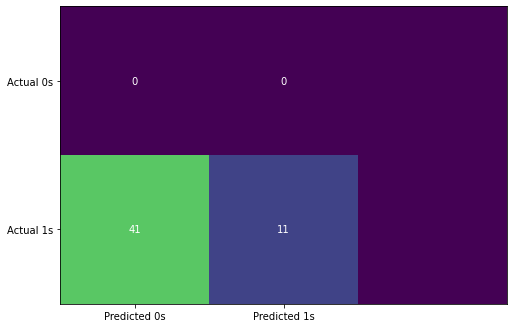

In [ ]:
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

# Implementing Logistic Regression from Scikit-Learn

#### Either you can choose to do all those coding yourself, or what you can do is just import a class form a phenominal library of python called Scikit-Learn, and use it's pre implemented Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=0)

#### Usinf the same method of fit to train the model

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

#### Trying to predict, and check the value of its prediction.

In [ ]:
model.predict_proba(X_test)

array([[1.90359202e-01, 8.09640798e-01],
       [9.97581556e-01, 2.41844420e-03],
       [4.64706630e-08, 9.99999954e-01],
       [1.00000000e+00, 3.87591655e-14],
       [8.23146871e-01, 1.76853129e-01],
       [9.96632063e-01, 3.36793707e-03],
       [4.49526308e-01, 5.50473692e-01],
       [8.25430640e-01, 1.74569360e-01],
       [9.50875952e-07, 9.99999049e-01],
       [0.00000000e+00, 1.00000000e+00],
       [2.06149886e-03, 9.97938501e-01],
       [8.04023514e-13, 1.00000000e+00],
       [9.77423991e-01, 2.25760093e-02],
       [2.18771085e-03, 9.97812289e-01],
       [7.59003198e-05, 9.99924100e-01],
       [0.00000000e+00, 1.00000000e+00],
       [9.99996985e-01, 3.01523278e-06],
       [0.00000000e+00, 1.00000000e+00],
       [9.99473270e-01, 5.26729918e-04],
       [1.00000000e+00, 4.52349926e-16],
       [6.10981099e-01, 3.89018901e-01],
       [9.97608002e-01, 2.39199831e-03],
       [1.42574856e-07, 9.99999857e-01],
       [9.47924289e-01, 5.20757114e-02],
       [2.153396

### The Confusion matrics

In [ ]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           1       0.81      0.86      0.83       180
           2       0.85      0.79      0.82       180

    accuracy                           0.82       360
   macro avg       0.83      0.82      0.82       360
weighted avg       0.83      0.82      0.82       360



### Neural Network for Classification

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(500, input_dim=360, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 500)               180500    
_________________________________________________________________
dense_8 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_9 (Dense)              (None, 50)                15050     
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 102       
Total params: 345,952
Trainable params: 345,952
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_test = le.fit_transform(y_test)
# y_train = le.transform(y_train)

from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [ ]:
model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test))

Epoch 1/50
8/8 [==============================] - 0s 10ms/step - loss: 1.0511e-05 - accuracy: 1.0000 - val_loss: 21.4627 - val_accuracy: 0.4790
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 9.9848e-06 - accuracy: 1.0000 - val_loss: 21.4597 - val_accuracy: 0.4790
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 9.5853e-06 - accuracy: 1.0000 - val_loss: 21.4574 - val_accuracy: 0.4790
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 9.2035e-06 - accuracy: 1.0000 - val_loss: 21.4551 - val_accuracy: 0.4790
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 8.8569e-06 - accuracy: 1.0000 - val_loss: 21.4522 - val_accuracy: 0.4790
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 8.5305e-06 - accuracy: 1.0000 - val_loss: 21.4508 - val_accuracy: 0.4790
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 8.2180e-06 - accuracy: 1.0000 - val_loss: 21.4485 - val_accuracy: 0.479

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_actual = []
prediction = []

for n, i in enumerate(y_pred):
    prediction.append(np.argmax(y_pred[n]))
    y_actual.append(np.argmax(y_test[n]))

### Neural Network Prediction results

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(prediction, y_actual))

              precision    recall  f1-score   support

           0       0.81      0.45      0.58        94
           1       0.22      0.60      0.33        25

    accuracy                           0.48       119
   macro avg       0.52      0.52      0.45       119
weighted avg       0.69      0.48      0.52       119



### The Confusion matrix

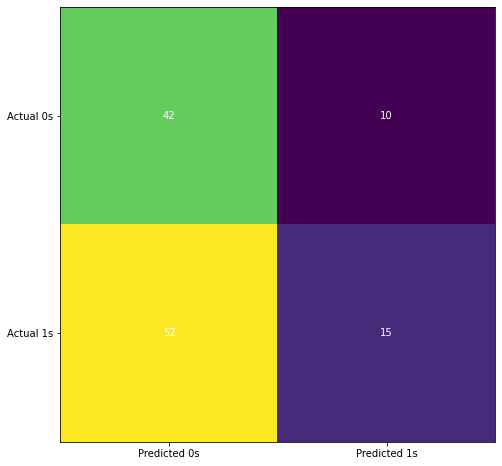

In [ ]:
cm = confusion_matrix(y_actual, prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()
